![Q-learning](qlearning.png)

In [115]:
%matplotlib inline

import gym
import random
import numpy as np
from collections import deque
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
env = gym.make('CartPole-v1')
env.reset()

array([-0.03396047, -0.00583837,  0.019833  , -0.01503954])

In [3]:
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[-0.0491562  -0.03970515  0.0165607  -0.01186912]
[-0.04995031 -0.23506064  0.01632332  0.28599256]
[-0.05465152 -0.04017524  0.02204317 -0.00149775]
[-0.05545502  0.15462375  0.02201321 -0.28714509]
[-0.05236255 -0.0408051   0.01627031  0.01239853]
[-0.05317865 -0.23615656  0.01651828  0.3101702 ]
[-0.05790178 -0.0412738   0.02272169  0.0227421 ]
[-0.05872726  0.15351505  0.02317653 -0.26268616]
[-0.05565696 -0.04192993  0.01792281  0.03721586]
[-0.05649555 -0.23730424  0.01866712  0.33549929]
[-0.06124164 -0.43268682  0.02537711  0.63400991]
[-0.06989538 -0.6281534   0.03805731  0.93457544]
[-0.08245844 -0.82376748  0.05674882  1.23897024]
[-0.09893379 -1.01957051  0.08152822  1.54887719]
[-0.1193252  -0.82551618  0.11250577  1.28270531]
[-0.13583553 -0.63199241  0.13815987  1.02726183]
[-0.14847538 -0.43895288  0.15870511  0.78095161]
[-0.15725443 -0.63585898  0.17432414  1.11906258]
[-0.16997161 -0.83278528  0.19670539  1.46096722]
Episode finished after 19 timesteps
[-0.01810472 -

[-0.03166826  0.21964905 -0.04500692 -0.34326195]
[-0.02727528  0.02519532 -0.05187216 -0.0651043 ]
[-0.02677137  0.22102112 -0.05317425 -0.37369149]
[-0.02235095  0.02669326 -0.06064808 -0.09823755]
[-0.02181708 -0.16750941 -0.06261283  0.17471127]
[-0.02516727 -0.36168198 -0.0591186   0.44700325]
[-0.03240091 -0.55591996 -0.05017854  0.72048048]
[-0.04351931 -0.36014103 -0.03576893  0.41243541]
[-0.05072213 -0.16453077 -0.02752022  0.10869388]
[-0.05401275 -0.35924777 -0.02534634  0.39256886]
[-0.0611977  -0.16377547 -0.01749496  0.09200356]
[-0.06447321 -0.35864235 -0.01565489  0.37911589]
[-0.07164606 -0.16330162 -0.00807258  0.08153835]
[-0.07491209 -0.35830693 -0.00644181  0.37166347]
[-0.08207823 -0.55333677  0.00099146  0.66230829]
[-0.09314497 -0.7484725   0.01423763  0.95530323]
[-0.10811442 -0.55354493  0.03334369  0.66712722]
[-0.11918531 -0.74911434  0.04668624  0.97011951]
[-0.1341676  -0.55464911  0.06608863  0.69246026]
[-0.14526058 -0.75062268  0.07993783  1.0051948 ]


[ 0.09959061 -0.24380028 -0.09587145  0.24899809]
[ 0.0947146  -0.43743167 -0.09089149  0.50996835]
[ 0.08596597 -0.63116351 -0.08069212  0.77268127]
[ 0.0733427  -0.43502953 -0.0652385   0.45573983]
[ 0.06464211 -0.23904877 -0.0561237   0.14322754]
[ 0.05986113 -0.43332391 -0.05325915  0.4176897 ]
[ 0.05119466 -0.62765225 -0.04490535  0.69311812]
[ 0.03864161 -0.82212343 -0.03104299  0.97133308]
[ 0.02219914 -0.62659891 -0.01161633  0.66906243]
[ 0.00966716 -0.82155743  0.00176492  0.95806536]
[-0.00676398 -1.01670307  0.02092622  1.25130224]
[-0.02709805 -0.82185542  0.04595227  0.96524662]
[-0.04353515 -0.62737984  0.0652572   0.6873464 ]
[-0.05608275 -0.43322147  0.07900413  0.41590075]
[-0.06474718 -0.23930291  0.08732215  0.14913327]
[-0.06953324 -0.04553287  0.09030481 -0.11477424]
[-0.0704439  -0.24182493  0.08800933  0.20497764]
[-0.07528039 -0.04806458  0.09210888 -0.05869666]
[-0.07624169 -0.24437822  0.09093495  0.26156726]
[-0.08112925 -0.44067263  0.09616629  0.58149036]


[0.04487108 0.00686413 0.01918261 0.0327759 ]
[ 0.04500836  0.20170582  0.01983813 -0.25379352]
[0.04904248 0.0063063  0.01476226 0.0450801 ]
[ 0.0491686  -0.18902419  0.01566386  0.34238386]
[0.04538812 0.00587145 0.02251154 0.05468125]
[ 0.04550555  0.20066351  0.02360516 -0.23081497]
[ 0.04951882  0.39544034  0.01898886 -0.51595955]
[ 0.05742763  0.20005621  0.00866967 -0.2173538 ]
[0.06142875 0.0048114  0.0043226  0.07805125]
[ 0.06152498  0.19987112  0.00588362 -0.21326475]
[0.0655224  0.00466555 0.00161833 0.08126831]
[ 0.06561571 -0.19047956  0.00324369  0.37446139]
[ 0.06180612 -0.38564744  0.01073292  0.66816531]
[ 0.05409317 -0.19067637  0.02409623  0.37888096]
[0.05027964 0.00409524 0.03167385 0.09389197]
[ 0.05036155 -0.19146603  0.03355168  0.3963973 ]
[ 0.04653223 -0.38704756  0.04147963  0.69946682]
[ 0.03879128 -0.19252448  0.05546897  0.4201247 ]
[0.03494079 0.00176944 0.06387146 0.14543157]
[ 0.03497618 -0.19420629  0.06678009  0.4575612 ]
[ 3.10920499e-02 -8.88409120

In [4]:
print(env.action_space)
# 0: 1 unit of force in left direction
# 1: 1 unit of force in right direction

Discrete(2)


In [5]:
print(env.observation_space)
# 0: Cart position
# 1: Cart velocity
# 2: Pole angle
# 3: Pole velocity at tip

Box(4,)


# Cartpole domain

In [6]:
env.action_space.n

2

In [7]:
env.observation_space.high

array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)

In [8]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

The input space is 4 dimensional and continuous.
* Cart position: $x: \in [-4.8, 4.8]$
* Cart velocity: $x' \in [-3.4*10^{38}, 3.4*10^{38}]$
* Angle: $\theta \in [-0.42, 0.42]$
* Angle velocity: $\theta' \in [-3.4*10^{38}, 3.4*10^{38}]$

# Q-learning parameters
* $\alpha$: Learning rate - Used to smooth the updates and make them less radical, which prevents errors caused by noise.
* $\epsilon$: Exploration rate - Regulates between explotation and exploration. Instead of picking the best action in a state, which a probability of $\epsilon$ a random action is picked. This should prevent the algorithm from getting stuck at a local minima (e.g. if a bad choice was made in the beginning, without $\epsilon$ the agent would never discover any other, potentially better, path.
* $\gamma$: Discount factor - Used to penalize the agent if it takes long to reach its goal. However in this case we set gamma to 1 since it is our goal to survive as long as possible.

In [9]:
np.repeat(1, 100)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
np.reshape([1, 2, 3, 4], [1, 4])

array([[1, 2, 3, 4]])

In [163]:
class QSolver():
    def __init__(
        self,
        env,
        eps,
        alpha,
        gamma,
        epochs=10,
        batch_size=32,
        training_size=320,
        memory_size=1000000,
        adam_learning_rate=0.02,
    ):
        
        self.env = env
        self.eps = eps
        self.alpha = alpha
        self.gamma = gamma
        self.memory = deque(maxlen=memory_size)
        self.epochs = epochs
        self.batch_size = batch_size
        self.training_size = training_size
        self.adam_learning_rate = adam_learning_rate

        self.model = Sequential()
        self.model.add(Dense(24, input_shape=(
            self.env.observation_space.shape[0],), activation="relu"))
        self.model.add(Dense(24, activation="relu"))
        self.model.add(Dense(24, activation="relu"))
        self.model.add(Dense(self.env.action_space.n, activation="linear"))
        self.model.compile(loss="mse", optimizer=Adam(lr=self.adam_learning_rate))

    def remember(self, state, action, newReward, newState, terminated):
        self.memory.append((state, action, newReward, newState, terminated))

    def greedy_action(self, state):
        #         X = self.feature_matrix(state)
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])

    def epsilon_greedy(self, state):
        if np.random.random() >= self.eps:
            return self.greedy_action(state)

        return self.env.action_space.sample()

    def experience_replay(self):
        if len(self.memory) < self.training_size:
            return
        training_experience = random.sample(self.memory, self.training_size)
        
        states = []
        q_valuess = []
        for idx, (state, action, newReward, newState, terminated) in enumerate(training_experience):
            q_update = newReward
            if not terminated:
                q_update = (newReward + self.gamma *
                            np.amax(self.model.predict(newState)[0]))
            q_values = self.model.predict(state)
            q_values[0][action] = (1-self.alpha) * \
                q_values[0][action] + self.alpha*q_update
        
            states.append(state.flatten())
            q_valuess.append(q_values.flatten())
            
        X_training = np.array(states)
        y_training = np.array(q_valuess)
        self.model.fit(
            X_training,
            y_training,
            verbose=0,
            batch_size=self.batch_size,
            epochs=self.epochs,
            use_multiprocessing=True,
        )

    def step(self, action):
        return self.env.step(action)

    def run_episode(self, render=False, exposition=False):
        state = self.env.reset()
        state = np.reshape(state, [1, self.env.observation_space.shape[0]])
        
        t = 0
        while True:
            t += 1

            if render:
                self.env.render()

            if exposition:
                action = self.greedy_action(state)
            else:
                action = self.epsilon_greedy(state)

            newState, newReward, terminated, info = self.env.step(action)
            
            # If terminal state, one gets a reward of 1 not -1.
            newReward = newReward if not terminated else -newReward
            
            newState = np.reshape(
                newState, [1, self.env.observation_space.shape[0]])

            if not exposition:
                # Add to memory
                self.remember(state, action, newReward, newState, terminated)

            # Update state
            state = newState

            if terminated:
                if t == 500:
                    print(f"Episode length: {t} BOOM")
                else:
                    print(f"Episode length: {t}")
                break
                

        # Update Model
        self.experience_replay()

        self.env.close()
        return t

    def run_q_learning(self, n_episodes, render=False):
        episode_lengths = []
        for t in range(n_episodes):
            #            old_params = self.model.coef_.copy()
            print(f"Episode: {t+1}")
            episode_length = self.run_episode()
            episode_lengths.append(episode_length)
#             if len(self.memory) > self.batch_size and np.allclose(old_params, self.model.coef_,  0.05):
#                 print(f'Learning Converged. Parameters: {self.model.coef_}')
#                 break

#            self.eps = 1/(t+1)
        return np.array(episode_lengths)

In [51]:
class DiscreteQSolver(QSolver):
    def __init__(self, env, eps, alpha, gamma, bucket_sizes=(7, 13, 7, 13)):
        QSolver.__init__(self, env, eps, alpha, gamma)
        self.bucket_sizes = bucket_sizes
        self.Q = np.zeros(bucket_sizes + (self.env.action_space.n,))
        
    def greedy_action(self, state):
        state_discrete = self.discretize(state, self.env.observation_space)
        return np.argmax(self.Q[tuple(state_discrete)])
    
    def step(self, action):
        observation, reward, done, info = self.env.step(action)
        return discretize(observation), reward, done, info
    
    def update_Q(self, state, action, newReward, newState):
        state_discrete = self.discretize(state.copy(), self.env.observation_space)
        newState_discrete = self.discretize(newState.copy(), self.env.observation_space)
        
        greedy_action = self.greedy_action(newState_discrete)
        q_greedy_action = self.Q[tuple(state_discrete)][greedy_action]
        self.Q[tuple(state_discrete)][action] + self.alpha * (newReward + self.gamma * q_greedy_action - self.Q[tuple(state_discrete)][action])     
        
    def discretize(self, obs, obs_space):
        bucket_arrays = [np.linspace(obs_space.low[i], obs_space.high[i], self.bucket_sizes[i]) for i, x in enumerate(obs)]
        state_space = [np.digitize(obs[i], bucket_arrays[i]) for i, x in enumerate(obs)]
        return np.array(state_space).ravel()-1

In [58]:
eps = 0.9
alpha = 0.05
gamma = 0.5
solver = DiscreteQSolver(env, eps, alpha, gamma)

In [158]:
eps = 0.1
alpha = 0.7
gamma = 0.95
batch_size = 32
epochs = 3
training_size = 1000
adam_learning_rate = 0.03
solver = QSolver(
    env,
    eps,
    alpha,
    gamma,
    batch_size=batch_size,
    epochs=epochs,
    training_size = training_size,
    adam_learning_rate = adam_learning_rate
)

In [159]:
episode_lengths = solver.run_q_learning(n_episodes=250)

Episode: 1
Episode length: 9
Episode: 2
Episode length: 13
Episode: 3
Episode length: 11
Episode: 4
Episode length: 10
Episode: 5
Episode length: 11
Episode: 6
Episode length: 10
Episode: 7
Episode length: 10
Episode: 8
Episode length: 10
Episode: 9
Episode length: 10
Episode: 10
Episode length: 11
Episode: 11
Episode length: 13
Episode: 12
Episode length: 9
Episode: 13
Episode length: 8
Episode: 14
Episode length: 11
Episode: 15
Episode length: 9
Episode: 16
Episode length: 11
Episode: 17
Episode length: 13
Episode: 18
Episode length: 10
Episode: 19
Episode length: 9
Episode: 20
Episode length: 12
Episode: 21
Episode length: 11
Episode: 22
Episode length: 9
Episode: 23
Episode length: 10
Episode: 24
Episode length: 10
Episode: 25
Episode length: 9
Episode: 26
Episode length: 9
Episode: 27
Episode length: 10
Episode: 28
Episode length: 9
Episode: 29
Episode length: 11
Episode: 30
Episode length: 10
Episode: 31
Episode length: 9
Episode: 32
Episode length: 9
Episode: 33
Episode length: 

Episode: 250
Episode length: 500 BOOM


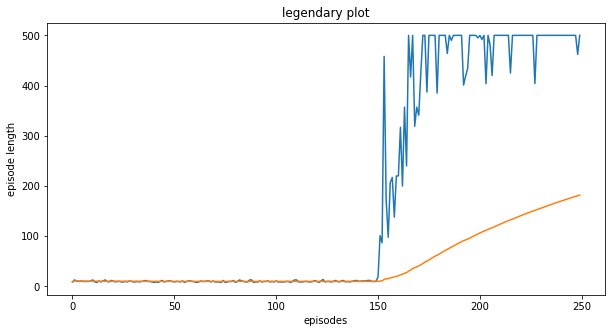

In [160]:
average_episode_lengths = (
    episode_lengths.cumsum() / np.array(range(1, len(episode_lengths) + 1))
)
plt.figure(figsize=(10,5))
plt.plot(episode_lengths)
plt.plot(average_episode_lengths)
plt.title('legendary plot')
plt.xlabel('episodes')
_ = plt.ylabel('episode length')

KeyboardInterrupt: 

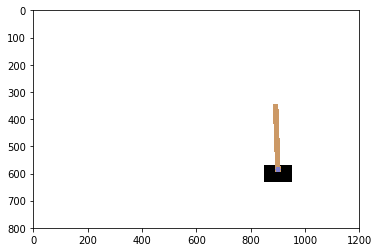

In [166]:
plt.imshow(solver.env.render(mode='rgb_array'))
solver.run_episode(render=True, exposition=True)

In [25]:
tuple(solver.discretize(env.reset(), env.observation_space))

(4, 6, 3, 6)

In [27]:
solver.Q[tuple(solver.discretize(env.reset(), env.observation_space))]

array([0., 0.])

In [161]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression()
reg.coef_ = np.zeros(2)
reg.intercept_ = 5
#reg.fit(X, y)
reg.predict(np.array([[3, 5]]))

array([5.])

In [138]:
reg.coef_

array([1., 2.])

In [160]:
reg.intercept_

3.0000000000000018

In [67]:
X = np.array([[20, 20]])
y = y[0]

In [69]:
reg.fit(X, y)

TypeError: Singleton array array(6) cannot be considered a valid collection.